# Exploratory Data Analysis

1.  Data Summary
2.  Categorical Data
3.  Correlation Analysis
4.  Time-Based Analysis
5.  Team Performance Analysis
6.  Advanced Stats
7.  Feature Insights

In [55]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd

# Add the project root to the Python path
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(notebook_dir)
sys.path.append(project_root)

from src.data.eda import (
    show_unique_value_counts,
    rank_teams_by_wins,
    correlation_analysis
)

from src.visualization.distribution_plots import (
    analyze_distribution
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load the games data from the parquet files
df_2016_plus = pd.read_parquet('../data/02_interim/df_2016_plus.parquet')
df_all_years = pd.read_parquet('../data/02_interim/df_all_years.parquet')

## 1.   Data Summary

**Columns**

*Descriptive*
-   id -> individual to each game
-   season, week, start_date, season_type -> year, week, date, and regular or post season
-   neutral_site, conference_game, venue_id, venue
-   team_id, team, team_name, opponent_id, opponent
-   team_division, team_conference, opponent_division, opponent_conference
-   is_home, home_away
-   matchup

*Advanced Stats (for both offense and defense)*
- drives, explosiveness, line_yards, line_yards_total
- open_field_yards, open_field_yards_total, plays
- power_success, ppa, second_level_yards
- second_level_yards_total, stuff_rate, success_rate
- total_ppa

*Situational Stats (for both offense and defense)*
- definitions:
    -   explosiveness: how often a team generates big plays -> pass of 19+ yards or run of 12+ yards
    -   ppa: predicted points added -> measure of the point value of a play based on down, distance, and field position
    -   success rate: successful if 50% of yards needed on 1st down, 70% on 2nd, or 100% on 3rd/4th
    -   passing downs: 2nd with 8+ yards, 3rd/4th with 5+ yards to go. else -> standard downs
- passing_downs:
  - explosiveness, ppa, success_rate
- passing_plays:
  - explosiveness, ppa, success_rate, total_ppa
- rushing_plays:
  - explosiveness, ppa, success_rate, total_ppa
- standard_downs:
  - explosiveness, ppa, success_rate

*Basic Stats*
- team_points, opponent_points, point_difference
- result, win
- totalYards, firstDowns, possessionTime
- thirdDownEff, fourthDownEff
- passingTDs, netPassingYards, completionAttempts, yardsPerPass
- rushingTDs, rushingYards, rushingAttempts, yardsPerRushAttempt
- puntReturns, puntReturnYards, puntReturnTDs
- kickingPoints
- totalPenaltiesYards
- turnovers, interceptions, interceptionYards, interceptionTDs, passesIntercepted
- totalFumbles, fumblesLost, fumblesRecovered

*Additional Stats (df_2016_plus only)*
- attendance, excitement_index
- kickReturnYards, kickReturnTDs, kickReturns
- tacklesForLoss, defensiveTDs, tackles, sacks
- qbHurries, passesDeflected
- team_talent, opponent_talent

**Potential Features**
-   season, week, season_type
-   neutral_site, venue_id, team_id, opponent_id, is_home
-   team_points, opponent_points, point_difference
-   team_conference, opponent_conference, but clean it up, have an "others"

**Target**
-   win
-   team_points, opponent_points

In [12]:
df_2016_plus.describe()

,id,season,week,attendance,venue_id,excitement_index,team_id,team_points,opponent_id,opponent_points,...,defense_rushing_plays.explosiveness,defense_rushing_plays.ppa,defense_rushing_plays.success_rate,defense_rushing_plays.total_ppa,defense_standard_downs.explosiveness,defense_standard_downs.ppa,defense_standard_downs.success_rate,team_talent,opponent_talent,win
count,7.110000e+03,7110.000000,7110.000000,7056.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,...,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7053.000000,7053.000000,7110.000000
mean,4.011719e+08,2019.485795,6.828411,54341.060091,3599.802813,4.154199,639.723629,27.875105,639.723629,27.875105,...,0.970859,0.122273,0.424549,4.949237,1.018064,0.100406,0.469214,653.525781,653.525781,0.500000
std,2.216096e+05,2.353129,4.163602,26451.872262,923.675137,2.667136,941.300448,15.194167,941.300448,15.194167,...,0.143877,0.228277,0.119566,8.241928,0.118962,0.233196,0.103324,191.918115,191.918115,0.500035
min,4.008689e+08,2016.000000,1.000000,0.000000,218.000000,0.007056,2.000000,0.000000,2.000000,0.000000,...,0.381488,-0.875943,0.000000,-23.508030,0.517540,-1.137507,0.000000,0.000000,0.000000,0.000000
25%,4.009375e+08,2017.000000,3.000000,37210.500000,3657.000000,1.927454,96.000000,17.000000,96.000000,17.000000,...,0.880051,-0.026881,0.344828,-0.823414,0.943460,-0.050193,0.404762,577.300000,577.300000,0.000000
50%,4.011125e+08,2019.000000,6.000000,51442.500000,3801.000000,3.824959,197.000000,27.000000,197.000000,27.000000,...,0.959802,0.121419,0.428571,3.996665,1.004616,0.103627,0.472222,660.360000,660.360000,0.500000
75%,4.014039e+08,2022.000000,11.000000,71530.000000,3907.000000,6.313311,333.000000,38.000000,333.000000,38.000000,...,1.039223,0.267516,0.500000,9.897520,1.079193,0.255913,0.538462,768.250000,768.250000,1.000000
max,4.015395e+08,2023.000000,16.000000,156990.000000,7311.000000,14.196259,2755.000000,81.000000,2755.000000,81.000000,...,2.017932,1.093324,0.846154,41.881364,2.034264,1.004370,0.836364,1016.790000,1016.790000,1.000000


In [10]:
# team conferences:
show_unique_value_counts(df_all_years, 'team_conference')


Unique value counts for team_conference:
----------------------------------------
Value                Count      Percentage
----------------------------------------
SEC                  3103       18.88%
ACC                  3068       18.66%
Big Ten              2952       17.96%
Big 12               2555       15.54%
Pac-12               1806       10.99%
Mid-American         399        2.43%
Conference USA       366        2.23%
FBS Independents     327        1.99%
Sun Belt             325        1.98%
Mountain West        260        1.58%
American Athletic    176        1.07%
Southern             135        0.82%
MVFC                 124        0.75%
Big East             124        0.75%
Big Sky              104        0.63%
OVC                  95         0.58%
CAA                  93         0.57%
Western Athletic     91         0.55%
Southland            73         0.44%
Pac-10               62         0.38%
MEAC                 58         0.35%
Big South            46        

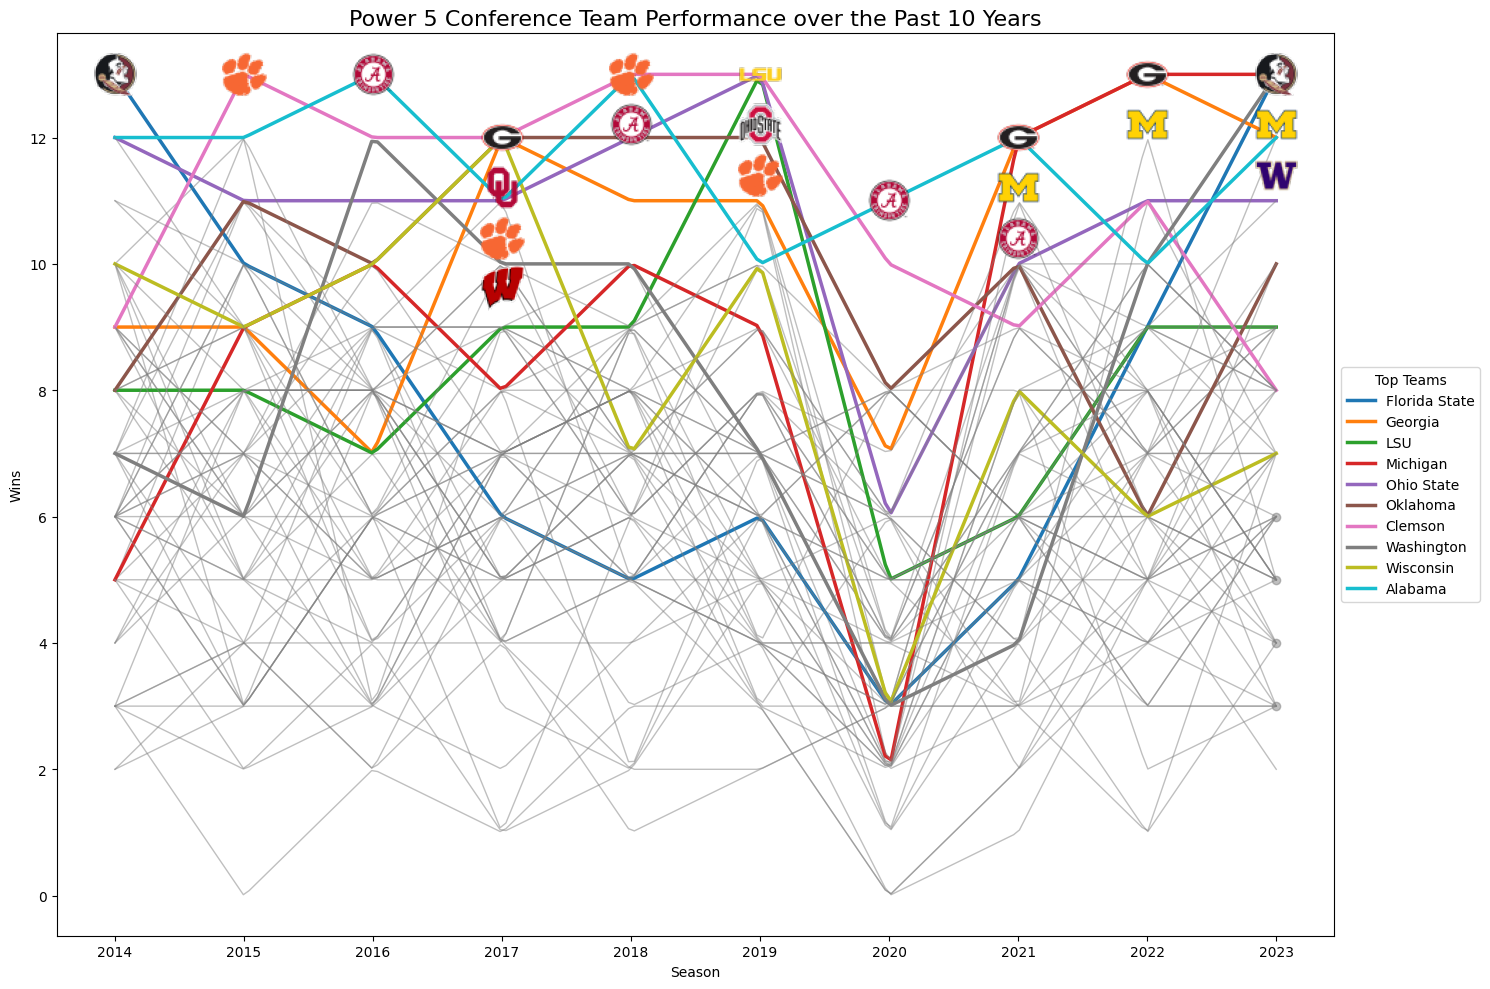

In [50]:
ranked_teams = rank_teams_by_wins(df_all_years, curvature=0)

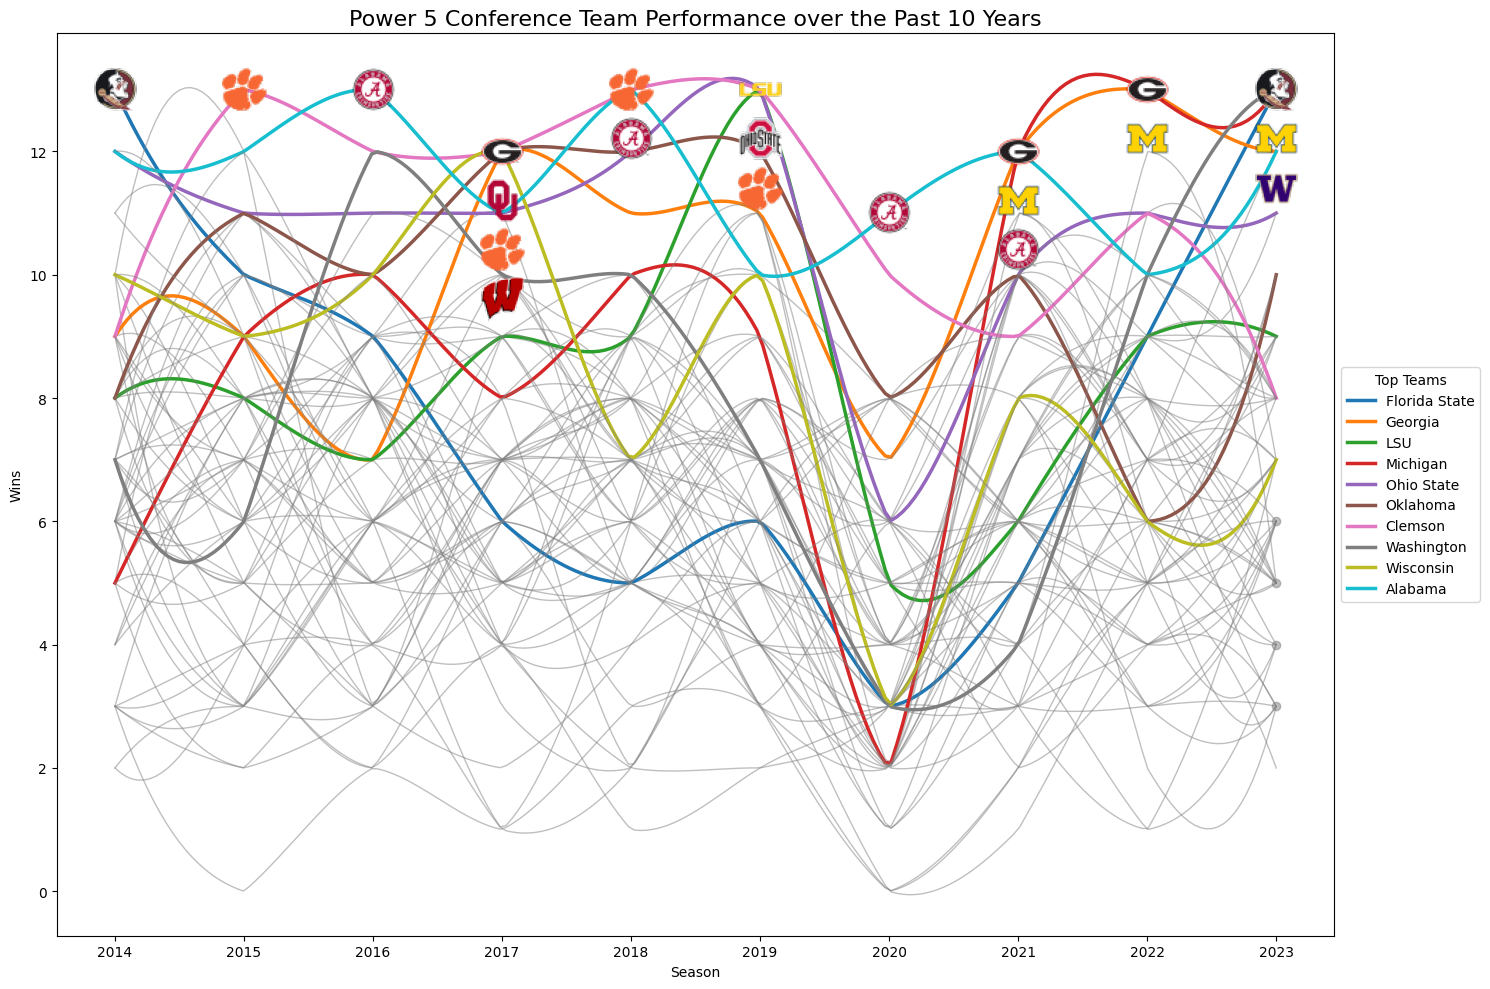

In [49]:
ranked_teams = rank_teams_by_wins(df_all_years, curvature=0.5)

##  3. Correlation Analysis

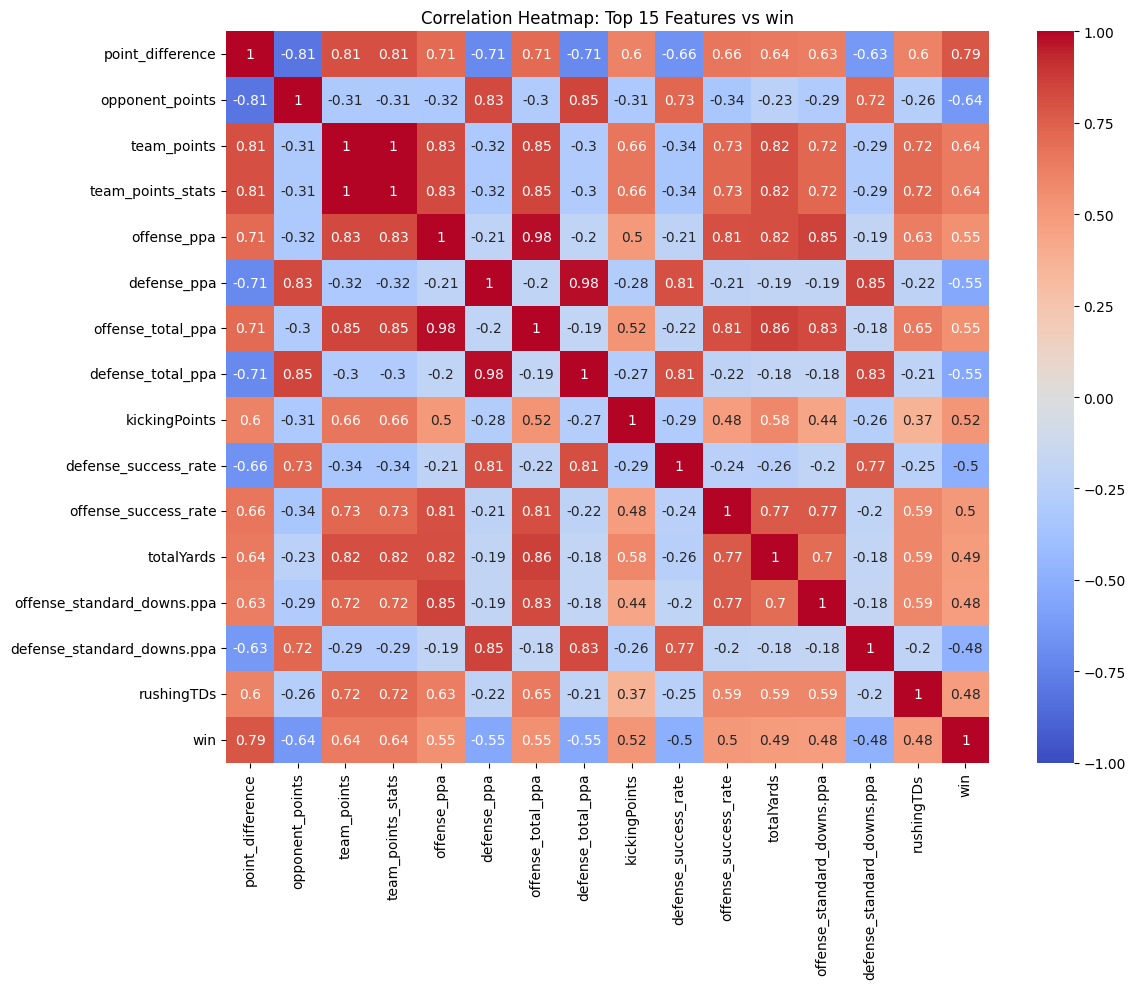

In [62]:
target_column = 'win'

correlation_matrix = correlation_analysis(df_2016_plus, target_column)
# print(correlation_matrix[target_column].sort_values(ascending=False))


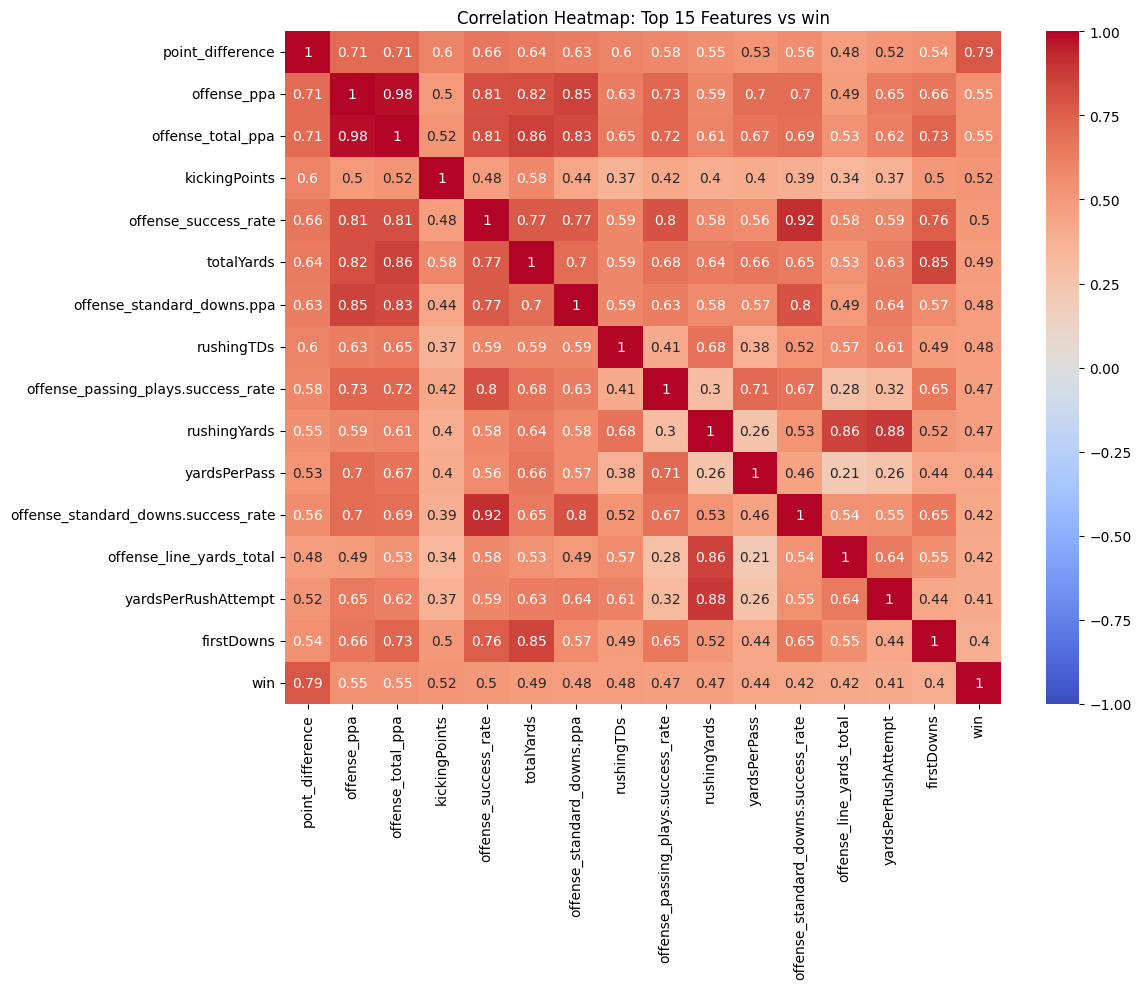

In [61]:
# filter out some columns (defense + specifics)

target_column = 'win'

# Filter out columns that start with 'offense_'
# Define columns to exclude
exclude_columns = [col for col in df_2016_plus.columns if col.startswith('defense_')] + \
                  ['team_points_stats', 'team_points', 'opponent_points']

# Filter columns
filtered_columns = [col for col in df_2016_plus.columns if col not in exclude_columns]

# Create filtered dataframe
filtered_df = df_2016_plus[filtered_columns]

correlation_matrix = correlation_analysis(filtered_df, target_column)
# print(correlation_matrix[target_column].sort_values(ascending=False))